Assignment 10
--------------
###Author: Sekhar Mekala


Please execute one cell at a time, sequentially.
Let us execute the "%matplotlib inline" statement, so that all the graphs will be displayed as inline objects

In [1]:
%matplotlib inline

Importing the required modules

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import math
import os
import csv
import re
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from skimage import io, filters

###Setting the current working directory
The following code prompts you to enter the directory location, where the input files reside. Just enter the directory (excluding the file name). 

In [3]:
dir = raw_input("\nEnter the directory where the input files are located\n ==>")    


Enter the directory where the input files are located
 ==>C:\Users\Sekhar\Documents\Python Scripts


If you entered incorrect location, click on the above cell, and press SHIFT+ENTER, and you will be prompted to enter the directory name again. Let us set the current working directory to the above directory. 

In [4]:
import os
os.chdir(dir)

###Reading the cars.data.csv file

In [5]:
try:
           file_reader = csv.reader(open("cars.data.csv"),delimiter = ',', quoting = csv.QUOTE_NONE)
except:
            print "\nThe given file location is incorrect.n"


buying = list()
maint = list()
doors = list()
persons = list()
lug_boot = list()
safety = list()
category = list()

for line in file_reader:
    buying.append(line[0]) 
    maint.append(line[1]) 
    doors.append(line[2]) 
    persons.append(line[3]) 
    lug_boot.append(line[4]) 
    safety.append(line[5]) 
    category.append(line[6])

    
df = DataFrame()

df['buying'] =  buying
df['maint'] =  maint
df['doors'] =  doors
df['persons'] =  persons
df['lug_boot'] =  lug_boot
df['safety'] =  safety
df['category'] =  category

print df


     buying  maint  doors persons lug_boot safety category
0     vhigh  vhigh      2       2    small    low    unacc
1     vhigh  vhigh      2       2    small    med    unacc
2     vhigh  vhigh      2       2    small   high    unacc
3     vhigh  vhigh      2       2      med    low    unacc
4     vhigh  vhigh      2       2      med    med    unacc
5     vhigh  vhigh      2       2      med   high    unacc
6     vhigh  vhigh      2       2      big    low    unacc
7     vhigh  vhigh      2       2      big    med    unacc
8     vhigh  vhigh      2       2      big   high    unacc
9     vhigh  vhigh      2       4    small    low    unacc
10    vhigh  vhigh      2       4    small    med    unacc
11    vhigh  vhigh      2       4    small   high    unacc
12    vhigh  vhigh      2       4      med    low    unacc
13    vhigh  vhigh      2       4      med    med    unacc
14    vhigh  vhigh      2       4      med   high    unacc
15    vhigh  vhigh      2       4      big    low    una

###Plotting the bar chart for some variables in cars.data.csv data set

We will plot barcharts for the "Buying", "Doors", "Safety" and "Maintenance" variables in the cars.data.csv file

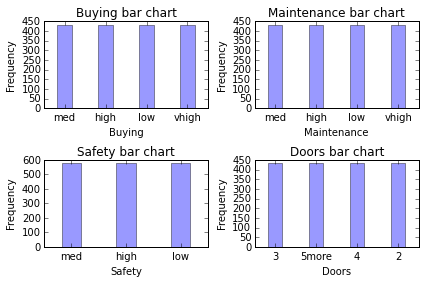

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat


l_buying = Series((df['buying']))
l = l_buying.value_counts()
buying_levels =  list(l.index)
buying_counts = list(l.values)
#print buying_levels 
#print buying_counts 


pos = range(1, len(buying_levels) + 1)
#print pos
ax0.bar(pos,buying_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 0])
plt.xticks(pos, buying_levels)
plt.xlabel('Buying')
plt.ylabel('Frequency')
plt.title('Buying bar chart')


l_maint = Series((df['maint']))
l = l_maint.value_counts()
maint_levels =  list(l.index)
maint_counts = list(l.values)
pos = range(1, len(maint_levels) + 1)
ax1.bar(pos,maint_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 1])
plt.xticks(pos, maint_levels)
plt.xlabel('Maintenance')
plt.ylabel('Frequency')
plt.title('Maintenance bar chart')


l_safety = Series((df['safety']))
l = l_safety.value_counts()
safety_levels =  list(l.index)
safety_counts = list(l.values)
pos = range(1, len(safety_levels) + 1)
ax2.bar(pos,safety_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[1, 0])
plt.xticks(pos, safety_levels)
plt.xlabel('Safety')
plt.ylabel('Frequency')
plt.title('Safety bar chart')



l_doors = Series((df['doors']))
l = l_doors.value_counts()
doors_levels =  list(l.index)
doors_counts = list(l.values)
pos = range(1, len(doors_levels) + 1)
ax3.bar(pos,doors_counts,  0.35, align='center', alpha=0.4)


plt.sca(axes[1, 1])
plt.xticks(pos, doors_levels)
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.title('Doors bar chart')






fig.tight_layout() 
plt.show()


###Reading the brainandbody.csv file

   Make sure that the brainandbody.csv file is present in the following directory:

In [7]:
os.getcwd()

'C:\\Users\\Sekhar\\Documents\\Python Scripts'

You can change the current working directory, in the third cell of this document.

In [8]:
    try:
            fsock = open("brainandbody.csv")
    except:
            print "\nThe given file location is incorrect. Enter file's location (complete path) again or EXIT to quit\n"


In [9]:
    try:
            file_lines = fsock.readlines()
            fsock.close()
    except:
            print "\nUnable to read file.\n"
            sys.exit()
       
    else:

            l = [(i.rstrip("\n")).split(",")for i in file_lines]
            body_list = list()
            brain_list = list()
            

            for j in range(1,len(l)):
                body_list.append(l[j][1])
                brain_list.append(l[j][2])

            body_weights_arr = np.array(body_list)
            brain_weights_arr = np.array(brain_list)
            x = brain_weights_arr.astype(float)
            y = body_weights_arr.astype(float)


###Scatter plot between "brain_weights" and "body_weights" variables of the "brainandbody.csv" file

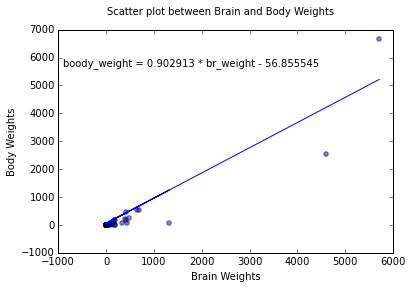

In [10]:
plt.scatter(x,y,alpha=0.5,)
plt.suptitle("Scatter plot between Brain and Body Weights")
plt.xlabel("Brain Weights")
plt.ylabel("Body Weights")
slope, intercept = np.polyfit(x,y,1)


if intercept > 0:
         eqn = "body_wt = %f * brain_wt + %f" % (slope, intercept)
if intercept < 0:
        intercept = -1 * intercept
        eqn = "boody_weight = %f * br_weight - %f" % (slope, intercept) 
if intercept == 0:
       eqn = "body_weight = %f * brain_weight" % (slope) 


plt.plot(x,slope*x + intercept, '-')
plt.text(-900, 6000,eqn, horizontalalignment='left',verticalalignment='top')
plt.show()

###Center points for objects.png image file

Make sure that the objects.png is in the current working directory, given below

In [11]:
os.getcwd()

'C:\\Users\\Sekhar\\Documents\\Python Scripts'

You can change your current working directory, using cell 3 of this document

8 regions found


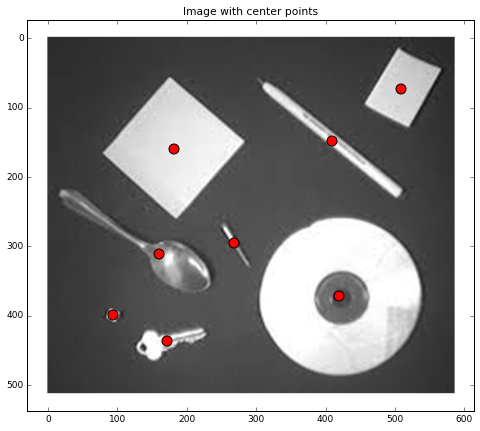

In [12]:
plt.rcParams['font.size'] = 9

#Reading the objects.png file
try:
   image = ndi.imread('objects.png')
except:
   print "The file objects.png is NOT found"

#Applying the gaussian filter to make the image blurr
#The image is futher filtered using the mean value of the pixels
filtered_array = filters.gaussian_filter(image, sigma = 2, multichannel=False)
filtered_array = filtered_array > filtered_array.mean()


#Displaying the original and filtered images
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#print len(image.shape)
l = len(image.shape)

filtered_array[:] = ndi.binary_opening(filtered_array,np.ones((np.ones(l) * 2)))
filtered_array[:] = ndi.binary_closing(filtered_array,np.ones((np.ones(l) * 2)))

labels, count = ndi.label(filtered_array)
print '%s regions found' % (count)

#Ploting the image with center of mass
fig, ax1 = plt.subplots(1, figsize=(8, 8))


ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Image with center points')

t = ndi.measurements.center_of_mass(filtered_array, labels, list(range(1,count+1)))
t_arr = np.array(t)

#Fishing the coordinates of center of mass
x = list(t_arr[:,1])
y = list(t_arr[:,0])

plt.scatter(x=x,y=y, c='r', s=100)

plt.show()


###Reading HTTP file

The following code will prompt you to enter the file name, in which the server requests information is present.

In [13]:
    s = raw_input("\nEnter File location. To quit, press ENTER on blank input\n ==>")    

    while True:
        if s == '':
            print '\n\nGood Bye'
            sys.exit()
        
        try:
            file_reader = csv.reader(open(s),delimiter = ' ', quoting = csv.QUOTE_NONE)
        except:
            print "\nThe given file location is incorrect. Enter file's location (complete path) again or EXIT to quit\n"
            s = raw_input("==>")
            continue
        else:
            break  
    
    
    origin = list()
    day = list()
    hour = list()
    minute = list()
    second = list()
    req_type = list()
    url = list()
    retcode = list()
    bytes_transferred = list()
    
    for line in file_reader:
        origin.append(line[0])

        dt = re.match(r'(.*):(.*):(.*):(.*)',re.sub(r'\[|\]','',line[1]))
        day.append(dt.group(1))
        hour.append(dt.group(2))
        minute.append(dt.group(3))
        second.append(dt.group(4))

        req = re.sub(r'\"| *','',line[2])
        req_type.append(req)
        if line[-1] == '-':
            bytes_transferred.append(long(0))
        else:
            bytes_transferred.append(long(line[-1]))


        retcode.append(int(line[-2]))
        l = len(line)
        u = re.sub(r'\"','',line[3])
        if (l > 7):
            #(l - 3), to avoid HTTP/1.0 text
            ul = line[4:(l-3)]
            ul = " ".join(ul)
            url.append(u +" "+ ul)
        else:
            url.append(u)
        
    df = DataFrame()
    

    df['origin'] = origin
    df['day'] = day
    df['hour'] = hour
    df['minute'] = minute
    df['second'] = second
    df['req_type'] = req_type
    df['url'] = url
    df['retcode'] = retcode
    df['bytes_transferred'] = bytes_transferred
    
    l = Series((df['hour']))
    l = l.value_counts()
    l = l.sort_index()


Enter File location. To quit, press ENTER on blank input
 ==>Assign_9_input.txt


Let us plot a graph between "The Hour" and "Number of requests" received per hour

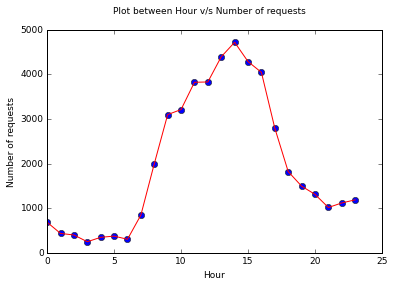

In [14]:
plt.plot(l,'o')
plt.plot(l,'r-')
plt.xlabel("Hour")
plt.ylabel("Number of requests")
plt.suptitle("Plot between Hour v/s Number of requests")
plt.show()

The above graph shows that the requests to the server has increased drastically from 07:00 hour onwards, reaching the maximum number of requests in the 14th hour of the day. After 14:00 hours, the number of requests started to decrease, with a drastic fall from 16:00 hour onwards